**Smart Inventory Optimization**

---



~By

Shreyas Bailkar - A101

Kunal Shenoy - A123

Amogh Bedekar - A130

In [268]:
import pandas as pd
import numpy as np

In [269]:
df = pd.read_csv('https://github.com/shreyas023/Smart_Inventory_Optimization/raw/main/Inventory_dataset.csv')

In [270]:
df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,low,none,A1,4.5,250.0,increasing,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,medium,seasonal,B2,4.0,350.0,stable,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,high,none,C3,3.8,120.0,decreasing,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,medium,none,A1,4.7,180.0,increasing,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,high,seasonal,B2,4.2,400.0,stable,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,low,none,C3,3.5,80.0,decreasing,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,medium,none,A1,4.8,150.0,increasing,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,medium,seasonal,B2,4.2,280.0,stable,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,low,none,C3,3.9,110.0,decreasing,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,high,none,A1,4.6,220.0,increasing,A


In [271]:
df.describe()

,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Customer_Reviews,Historical_Sales_Data
count,586.000000,571.000000,577.000000,573.000000,581.000000,583.000000,575.000000,572.000000
mean,18.757509,622.362522,9126.773397,5.858639,208.123924,324.924528,4.029739,622.788462
std,23.217697,1761.061540,35701.073066,5.300012,108.236850,809.568491,0.502089,1700.243409
min,1.500000,0.000000,0.000000,1.000000,7.000000,0.000000,2.500000,0.000000
25%,7.862500,95.000000,1309.000000,3.000000,150.000000,85.000000,3.800000,110.000000
50%,11.600000,150.000000,1810.000000,5.000000,180.000000,150.000000,4.100000,190.000000
75%,18.362500,280.000000,2366.000000,6.000000,240.000000,245.000000,4.400000,320.000000
max,200.000000,10000.000000,375000.000000,30.000000,365.000000,5000.000000,4.900000,9800.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 587 non-null    object 
 1   Item_Cost              586 non-null    float64
 2   Item_Count             571 non-null    float64
 3   Total_Cost             577 non-null    float64
 4   Lead_Time              573 non-null    float64
 5   Shelf_Life             581 non-null    float64
 6   EOQ                    583 non-null    float64
 7   Lead_Time_Variability  582 non-null    object 
 8   Seasonality            582 non-null    object 
 9   Warehouse_Location     586 non-null    object 
 10  Customer_Reviews       575 non-null    float64
 11  Historical_Sales_Data  572 non-null    float64
 12  Demand_Fluctuation     580 non-null    object 
 13  ABC_Classification     563 non-null    object 
dtypes: float64(8), object(6)
memory usage: 64.3+ KB


In [273]:
df.isnull().sum()

SKU_ID                    0
Item_Cost                 1
Item_Count               16
Total_Cost               10
Lead_Time                14
Shelf_Life                6
EOQ                       4
Lead_Time_Variability     5
Seasonality               5
Warehouse_Location        1
Customer_Reviews         12
Historical_Sales_Data    15
Demand_Fluctuation        7
ABC_Classification       24
dtype: int64

In [274]:
df.dropna(subset=['ABC_Classification'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 586
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 563 non-null    object 
 1   Item_Cost              562 non-null    float64
 2   Item_Count             550 non-null    float64
 3   Total_Cost             553 non-null    float64
 4   Lead_Time              550 non-null    float64
 5   Shelf_Life             557 non-null    float64
 6   EOQ                    559 non-null    float64
 7   Lead_Time_Variability  558 non-null    object 
 8   Seasonality            559 non-null    object 
 9   Warehouse_Location     562 non-null    object 
 10  Customer_Reviews       551 non-null    float64
 11  Historical_Sales_Data  561 non-null    float64
 12  Demand_Fluctuation     559 non-null    object 
 13  ABC_Classification     563 non-null    object 
dtypes: float64(8), object(6)
memory usage: 66.0+ KB


In [275]:
df.isnull().sum()

SKU_ID                    0
Item_Cost                 1
Item_Count               13
Total_Cost               10
Lead_Time                13
Shelf_Life                6
EOQ                       4
Lead_Time_Variability     5
Seasonality               4
Warehouse_Location        1
Customer_Reviews         12
Historical_Sales_Data     2
Demand_Fluctuation        4
ABC_Classification        0
dtype: int64

In [276]:
# Replace null values with the most frequent value for each column
for column in df.columns:
    most_frequent = df[column].mode()[0]
    df[column].fillna(most_frequent, inplace=True)

df.isnull().sum()

SKU_ID                   0
Item_Cost                0
Item_Count               0
Total_Cost               0
Lead_Time                0
Shelf_Life               0
EOQ                      0
Lead_Time_Variability    0
Seasonality              0
Warehouse_Location       0
Customer_Reviews         0
Historical_Sales_Data    0
Demand_Fluctuation       0
ABC_Classification       0
dtype: int64

In [277]:
df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,low,none,A1,4.5,250.0,increasing,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,medium,seasonal,B2,4.0,350.0,stable,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,high,none,C3,3.8,120.0,decreasing,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,medium,none,A1,4.7,180.0,increasing,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,high,seasonal,B2,4.2,400.0,stable,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,low,none,C3,3.5,80.0,decreasing,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,medium,none,A1,4.8,150.0,increasing,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,medium,seasonal,B2,4.2,280.0,stable,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,low,none,C3,3.9,110.0,decreasing,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,high,none,A1,4.6,220.0,increasing,A


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 586
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 563 non-null    object 
 1   Item_Cost              563 non-null    float64
 2   Item_Count             563 non-null    float64
 3   Total_Cost             563 non-null    float64
 4   Lead_Time              563 non-null    float64
 5   Shelf_Life             563 non-null    float64
 6   EOQ                    563 non-null    float64
 7   Lead_Time_Variability  563 non-null    object 
 8   Seasonality            563 non-null    object 
 9   Warehouse_Location     563 non-null    object 
 10  Customer_Reviews       563 non-null    float64
 11  Historical_Sales_Data  563 non-null    float64
 12  Demand_Fluctuation     563 non-null    object 
 13  ABC_Classification     563 non-null    object 
dtypes: float64(8), object(6)
memory usage: 66.0+ KB


In [279]:
df.nunique()

SKU_ID                   562
Item_Cost                190
Item_Count                58
Total_Cost               267
Lead_Time                 13
Shelf_Life                 8
EOQ                       68
Lead_Time_Variability      3
Seasonality                2
Warehouse_Location         3
Customer_Reviews          21
Historical_Sales_Data     53
Demand_Fluctuation         3
ABC_Classification         3
dtype: int64

In [280]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()

In [281]:
# df['ABC_Classification'] = le.fit_transform(df[['ABC_Classification']])
df['Seasonality'] = le.fit_transform(df[['Seasonality']])
df['Lead_Time_Variability'] = le.fit_transform(df[['Lead_Time_Variability']])
df['Warehouse_Location'] = le.fit_transform(df[['Warehouse_Location']])
df['Demand_Fluctuation'] = le.fit_transform(df[['Demand_Fluctuation']])

df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,1.0,0.0,0.0,4.5,250.0,1.0,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,2.0,1.0,1.0,4.0,350.0,2.0,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,0.0,0.0,2.0,3.8,120.0,0.0,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,2.0,0.0,0.0,4.7,180.0,1.0,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,0.0,1.0,1.0,4.2,400.0,2.0,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,1.0,0.0,2.0,3.5,80.0,0.0,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,2.0,0.0,0.0,4.8,150.0,1.0,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,2.0,1.0,1.0,4.2,280.0,2.0,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,1.0,0.0,2.0,3.9,110.0,0.0,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,0.0,0.0,0.0,4.6,220.0,1.0,A


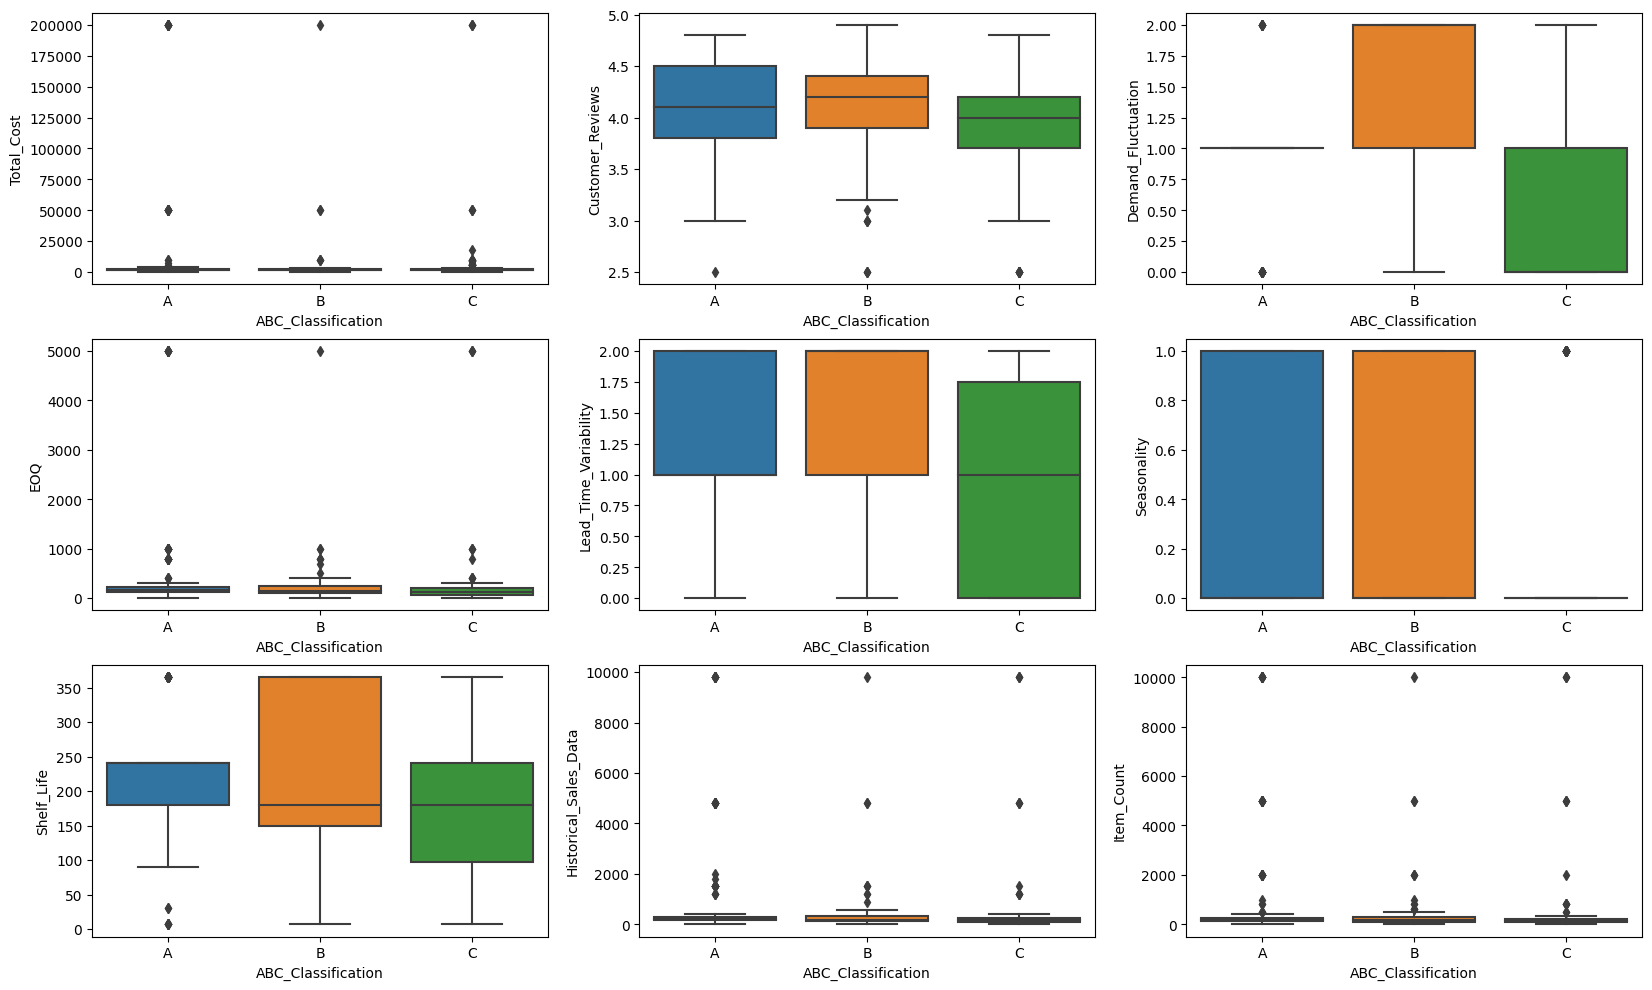

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x=df['ABC_Classification'],y=df['Total_Cost'])
plt.subplot(3,3,2)
sns.boxplot(x=df['ABC_Classification'],y=df['Customer_Reviews'])
plt.subplot(3,3,3)
sns.boxplot(x=df['ABC_Classification'],y=df['Demand_Fluctuation'])
plt.subplot(3,3,4)
sns.boxplot(x=df['ABC_Classification'],y=df['EOQ'])
plt.subplot(3,3,5)
sns.boxplot(x=df['ABC_Classification'],y=df['Lead_Time_Variability'])
plt.subplot(3,3,6)
sns.boxplot(x=df['ABC_Classification'],y=df['Seasonality'])
plt.subplot(3,3,7)
sns.boxplot(x=df['ABC_Classification'],y=df['Shelf_Life'])
plt.subplot(3,3,8)
sns.boxplot(x=df['ABC_Classification'],y=df['Historical_Sales_Data'])
plt.subplot(3,3,9)
sns.boxplot(x=df['ABC_Classification'],y=df['Item_Count'])

plt.show()


In [283]:
df = df[(df['Total_Cost'] <= 50000) & (df['Historical_Sales_Data'] <= 1500) & (df['EOQ'] <= 500) & (df['Item_Count'] <= 1000)]

df.shape

(517, 14)

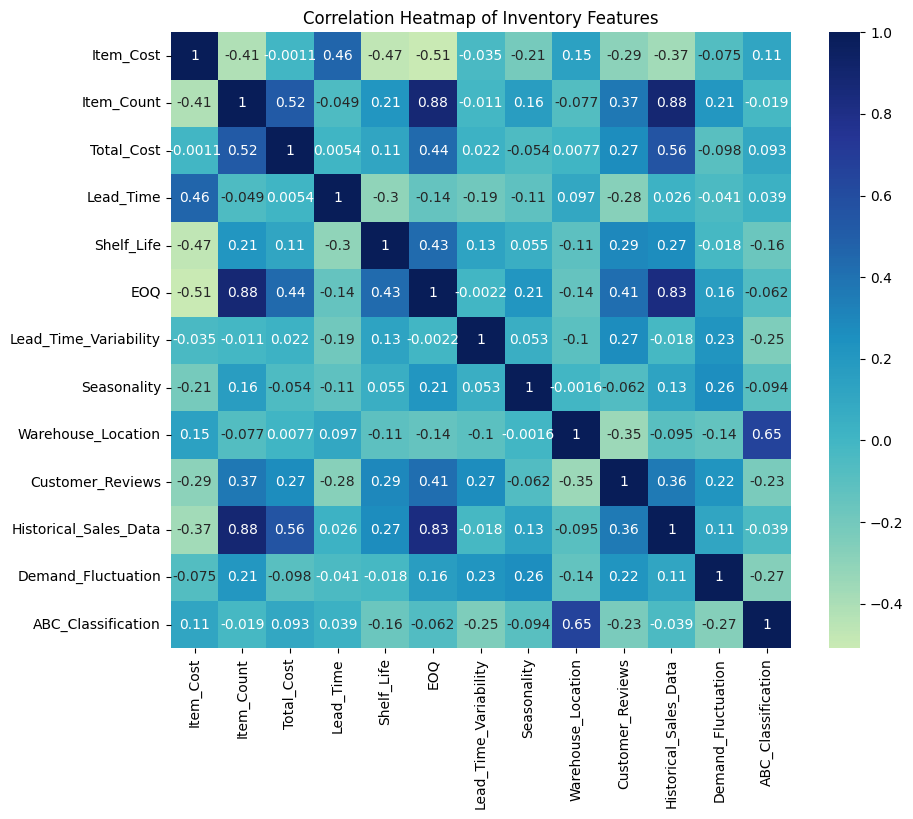

In [288]:
plt.figure(figsize=(10, 8))

d = df.drop(columns='SKU_ID')

d['ABC_Classification'] = le.transform(d[['ABC_Classification']])
corr_matrix = d.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, center=0)
plt.title('Correlation Heatmap of Inventory Features')
plt.show()


In [404]:
from sklearn.model_selection import train_test_split

X = df.drop(['ABC_Classification','SKU_ID'],axis=1)
y = df['ABC_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)

In [405]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [406]:
y_pred = model.predict(X_test)

In [407]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.90      0.92      0.91        48
           B       0.96      0.92      0.94        53
           C       0.95      0.96      0.95        55

    accuracy                           0.94       156
   macro avg       0.94      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156



In [408]:
print(confusion_matrix(y_test,y_pred))

[[44  2  2]
 [ 3 49  1]
 [ 2  0 53]]


In [409]:
print('Accuracy :',np.round(accuracy_score(y_test,y_pred),decimals=4)*100,'%')

Accuracy : 93.58999999999999 %
